## Distribución geográfica de inmuebles

In [4]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gp

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.

In [5]:
# Cargamos el dataframe
df = pd.read_csv('datos/train.csv', index_col='id', parse_dates=['fecha'])

In [6]:
maps = gp.read_file('datos/mapa.shp')
zonaProp_group = df.groupby('provincia').agg({'precio': 'mean'})
zonaProp_group.index = zonaProp_group.index.str.lower()

map_aux = maps.copy()
map_aux['ENTIDAD'] = maps['ENTIDAD'].str.lower()
map_aux['ENTIDAD'] = map_aux['ENTIDAD'].replace({
    'baja california': 'baja california norte',
    'veracruz de ignacio de la llave': 'veracruz',
    'yucatan': 'yucatán',
    'michoacan de ocampo': 'michoacán',
    'san luis potosi': 'san luis potosí',
    'queretaro de arteaga': 'querétaro',
    'nuevo leon': 'nuevo león',
    'coahuila de zaragoza': 'coahuila',
    'mexico': 'edo. de méxico',  
})

merge = map_aux.merge(zonaProp_group, left_on='ENTIDAD', right_on='provincia')

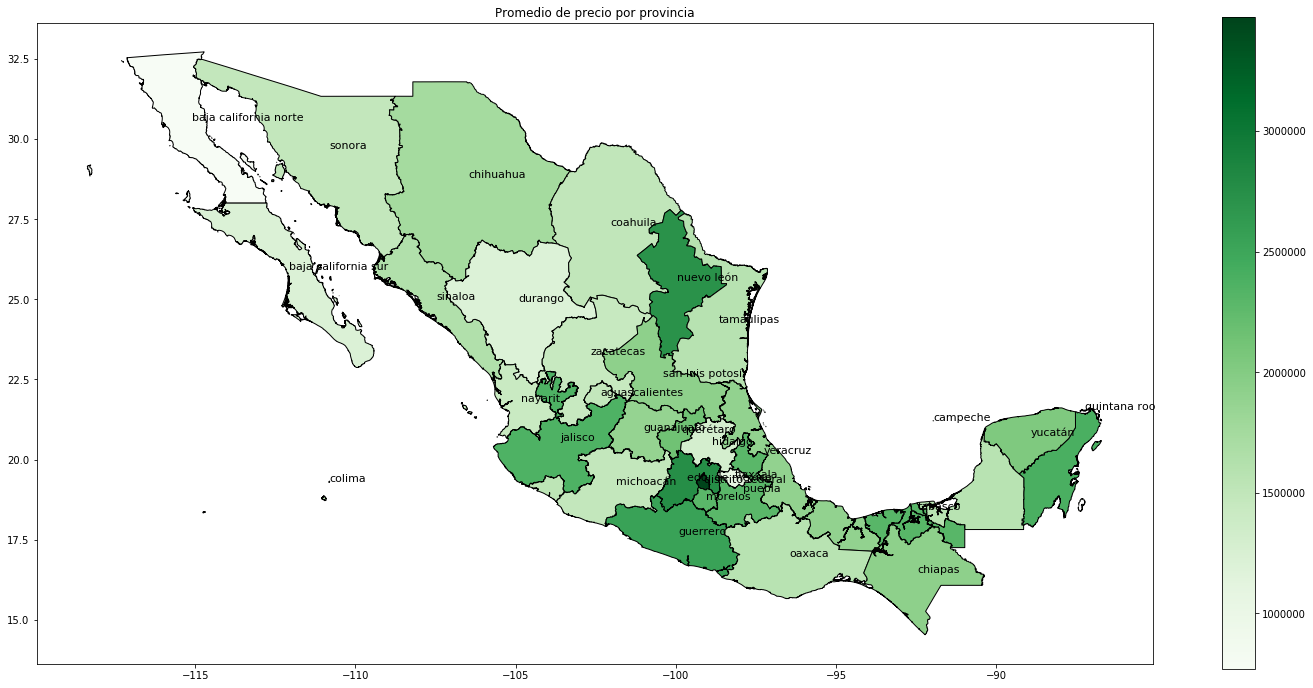

In [7]:
ax = merge.plot(edgecolor='black', legend=True, figsize=(25, 12), column='precio', cmap='Greens')
ax.set_title('Promedio de precio por provincia')

merge["center"] = merge["geometry"].centroid
za_points = merge.copy()
za_points.set_geometry("center", inplace = True)
texts = []

entidades_incluidas = {}

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["ENTIDAD"]):
    if label in entidades_incluidas:
        continue
    entidades_incluidas[label] = True
    texts.append(plt.text(x, y, label, fontsize=11))
